In [438]:
#Import the neccesary package
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [533]:
#función para conseguir el conjunto de datos.
from sklearn.impute import SimpleImputer#Missing values

def read_data(file:str, col_names, val=0):#Replace with 0
    data = pd.read_csv(file, sep = " " , names = col_names , header = None)
    #Los datos nulos se encuentran señalados por un signo ?
    #Data  with 00 or 0 reprecent n/a or not answer    
    data.replace('?' , 0, inplace=True)
    #Row with class not answer
    if val==0:
        data.drop(data.index[132], inplace=True)
    #Label
    label = data.loc[: , 'outcome'] #Labels
    label.replace("3" , 2,inplace= True)
    label = label.astype(int)
    #Filter columns
    data.drop(columns = ['outcome', 'Hospital','lt_3', 'lt_2', 'naso_reflux_ph', 'abdom_total_protein', 'naso_reflux_ph', 'abdom_total_protein', 'abdominal_distension'], inplace = True)
    #Normalization
    #x = data.values#return a numpy array
    #norm = preprocessing.MinMaxScaler()
    #x_norm = norm.fit_transform(x)#Norm
    #data = pd.DataFrame(x_norm)
    return data, label
def read_data_m(file:str, col_names, val=0):#Replace with 0
    data = pd.read_csv(file, sep = " " , names = col_names , header = None)

    #Los datos nulos se encuentran señalados por un signo ?
    #Data  with 00 or 0 reprecent n/a or not answer    
    data.replace('?' , 0, inplace=True)
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(data.values)
    d = imputer.transform(data.values)
    data = pd.DataFrame(d, columns=col_names)

    #Row with class not answer
    if val==0:
        data.drop(data.index[132], inplace=True)
    #Label
    label = data.loc[: , 'outcome'] #Labels
    label.replace("3" , 2,inplace= True)
    label = label.astype(int)
    #Filter columns
    data.drop(columns = ['outcome', 'Hospital', 'lt_3', 'lt_2', 'naso_reflux_ph', 'abdom_total_protein'], inplace = True)
    #Normalization
    x = data.values#return a numpy array
    norm = preprocessing.MinMaxScaler()
    x_norm = norm.fit_transform(x)#Norm
    data = pd.DataFrame(x_norm)
    return data, label

if __name__ == '__main__':
    col_names = ['surgery', 'Age', 'Hospital', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_extrimities', 'peripheral_pulse', 'mucous_membranes', 'capilary_refill', 'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'naso_reflux', 'naso_reflux_ph', 'rectal_exam_faces', 'abdomen', 'packed_cell_vol', 'total_protein', 'abdom_apperance', 'abdom_total_protein', 'outcome', 'surgicl_lesion', 'lt_1', 'lt_2', 'lt_3', 'pathology_case']
    #For mmissing val = 0
    df_train, label = read_data('horse-colic.data', col_names)
    df_test, label_test = read_data('horse-colic.test', col_names, val=1)
    #For missing val = median
    df_train_m, label_m = read_data_m('horse-colic.data', col_names)
    df_test_m, label_test_m = read_data_m('horse-colic.test', col_names, val=1)
    
    n, m = df_train.shape

In [534]:

#Libraries for create the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

d = {}
X_train, y_train = df_train, label
print(X_train.shape)
X_test, y_test = df_test, label_test
#Train part
#model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test , y_pred))
################################
##############
X_train, y_train = df_train_m, label_m
X_test, y_test = df_test_m, label_test_m

#Train part
#model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test , y_pred)

(299, 21)
0.7647058823529411


/home/fermat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7205882352941176

In [511]:
#Plot porcentage missing values
#miss_val = (df_train.count().to_numpy() / n) * 100
#fig, ax = plt.subplots(figsize=(8, 16))
#ax.scatter(miss_val, col_names)
#for i in range(m):
#    porce = round(miss_val[i], 2)
#    aux = col_names[i] + '   %s %%' %(porce)
#    ax.annotate(aux, (porce, col_names[i], ))

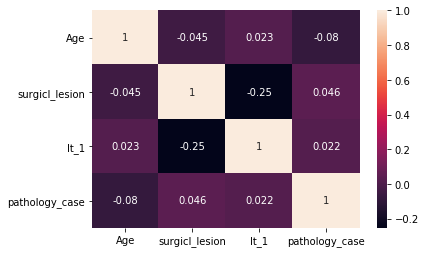

In [512]:
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [514]:
#For get the name column of missing values 
data = []
for i in range(m):
    data.append([col_names[i], miss_val[i]])
df = pd.DataFrame(data, columns=['Atr', 'miss_val'])
df[df['miss_val'] <= 70]

,Atr,miss_val
12,abdominal_distension,65.217391
13,nasogastric_tube,64.548495
14,naso_reflux,65.886288
15,naso_reflux_ph,60.535117
18,packed_cell_vol,44.816054
